# XRD Example

In this example, we read in a `.bgf` atomic configuration file of a Pt nanoparticle (obtained from [DOI:10.5281/zenodo.6322004](https://doi.org/10.5281/zenodo.6322004)) into an `ase.Atoms` object and use it to calculate a Powder XRD spectrum.

First, we need to define a dictionary with atomic scattering factors. These are obtained from [Cromer, Mann Acta Cryst A24 321-324 (1968)](https://scripts.iucr.org/cgi-bin/paper?s0567739468000550).

In [73]:
fdict = {'Pt':[36.8102, 13.0747, 11.3323, 2.31421, 1.04422,
               6.07340, 15.7018, 73.8375, 14.4526],
         'O':[2.95648, 2.45240, 1.50510, 0.78135, 13.8964,
              5.91765, 0.34537, 34.0811, 0.30413]}

Next, we use `asetools.systemtools.read_bgf` to read in the ReaxFF-style atomic configuration file.

In [74]:
from asetools.systemtools import read_bgf

atoms = read_bgf("Pt_nanoparticle.bgf")

Let's visualize the structure so we know what we're working with.

In [75]:
from ase.visualize import view

visatoms = atoms.copy()
center = visatoms.cell.diagonal() / 2
visatoms.set_positions(visatoms.get_positions() - center)
visatoms.translate([0, 0, -32])

view(visatoms, viewer="x3d")

Next, execute the xrd function. We will use the default setting for the incidence radiation wave length ($\mathrm{Cu-K}_{\alpha}$) and scan incidence angles between 10° and 40°.

In [76]:
from asetools.analysis.xrd import xrd

spectrum = xrd(atoms, coeff=fdict, thetaMin=30, thetaMax=90)

The `xrd` function provides a `zip` object of the $2\Theta$ value and the corresponding intensity. Let's plot the results with `pyplot`.

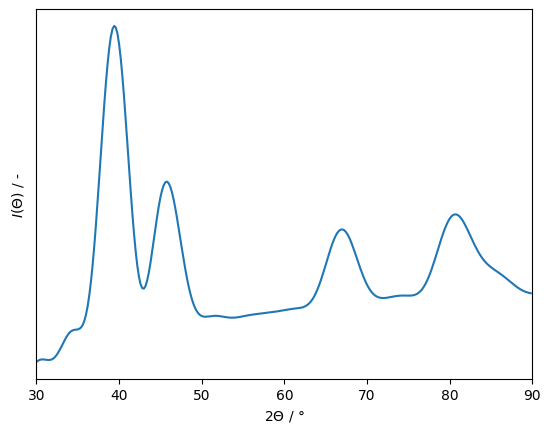

In [77]:
import matplotlib.pyplot as plt

x, y = zip(*spectrum)
plt.plot(x, y)
plt.xlabel("$2\Theta$ / °")
plt.ylabel("$I(\Theta)$ / -")
plt.yticks([])
plt.xlim([30,90])
plt.show()